In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import sympy as sy
from sympy.solvers import solve
import pandas as pd

In [2]:
df1=pd.DataFrame.from_csv('A2_Schuster.csv',sep=';',encoding='utf-8')
#df1 #Zeigt dir die Tabelle an
df2=df1.sort_values('r in cm')
r=df2['r in m']= df2['r in cm']*1e-2
B=df2['B in T']=df2['B in mT']*1e-3
U=df2['U in V']
df2

,U in V,r in cm,B in mT,r in m,B in T
NaT,250,2,2.86,0.02,0.00286
NaT,200,2,2.65,0.02,0.00265
NaT,190,2,2.57,0.02,0.00257
NaT,220,2,2.74,0.02,0.00274
NaT,180,2,2.51,0.02,0.00251
NaT,170,2,2.45,0.02,0.00245
NaT,230,2,2.79,0.02,0.00279
NaT,160,2,2.40,0.02,0.00240
NaT,240,2,2.83,0.02,0.00283
NaT,150,2,2.34,0.02,0.00234


In [3]:
def func(x,a,b):
    return a*x+b

[  1.77872806e+11  -9.05004766e+01]
 
1.779e+11 x - 90.5


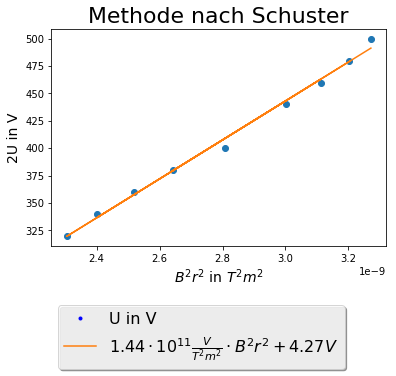

[  1.70564491e+11  -4.58601026e+01]
 
1.706e+11 x - 45.86


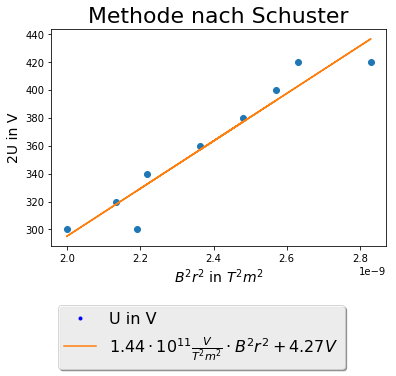

[  1.60840250e+11   1.26573393e+01]
 
1.608e+11 x + 12.66


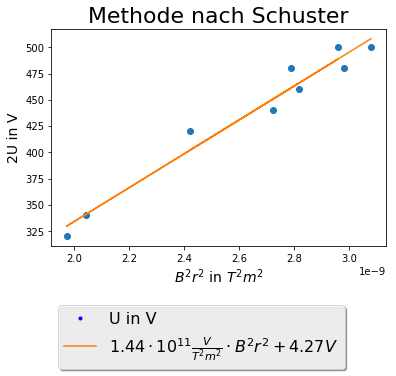

[  2.01743100e+11  -6.86598466e+01]
 
2.017e+11 x - 68.66


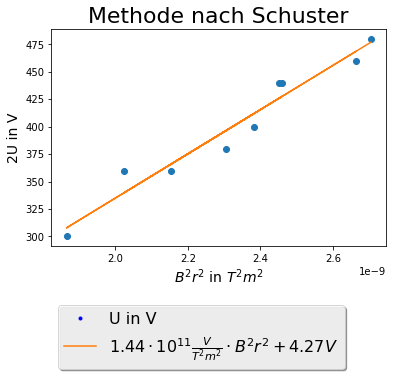

In [4]:
a=0;b=9
while b<=len(U):
    x=r[a:b]**2*B[a:b]**2
    y=2*U[a:b]

    plt.plot(x,y,'b.')
    fit = np.polyfit(x,y,1)
    fit_fn = np.poly1d(fit) 
    print(fit)
    print(fit_fn)
    plt.plot(x,y,'o',label='')
    plt.plot(x, fit_fn(x), '-',label=r'$1.44 \cdot 10^{11} \frac{V}{T^2m^2} \cdot B^2r^2 + 4.27 V$')
    plt.xlabel(r'$B^2r^2$ in $T^2m^2$', fontsize = 14)
    plt.ylabel(r'2U in V', fontsize = 14)
    plt.title('Methode nach Schuster',fontsize=22)
    plt.legend(loc='lower right', bbox_to_anchor=(0.9, -0.6),fontsize=16,fancybox=True, shadow=True)
    
    plt.show()
    
    a+=9
    b+=9

fit parameter 1-sigma error
———————————–
177.872806095+-5.24434249915
-90.5004771381+-14.8306640466


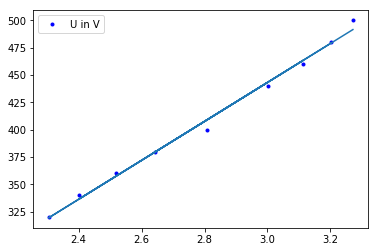

In [23]:
a=0;b=9;g=1e9
x=r[a:b]**2*B[a:b]**2*g
y=2*U[a:b]
plt.plot(x,y,'b.') 
popt, pcov = curve_fit(func, x, y, sigma= None)
popt=popt
#pcov=pcov*(1/g)
perr = np.sqrt(np.diag(pcov))
print('fit parameter 1-sigma error'); print('———————————–')
for i in range(len(popt)):
    print(str(popt[i])+'+-'+str(perr[i]))
    
fit=func(x[a:b], *popt)   
plt.plot(x[a:b], fit)
#s2=r'''\begin{tabular}{ c | c | c } %s & Wert & Fehler \\\hline %s & %4.3g & %3.3g \\\hline %s &%3.3g & %3.3g \end{tabular}'''%('char1','char2',popt[0],perr[0],'char3',popt[1],perr[1])      
#plt.text(0,0,s2,ha="left",va="center",bbox=dict(boxstyle="square",ec='gold',fc='whitesmoke',))

plt.legend()
plt.show()

In [1]:
import lmfit as lf
lf.minimize?